In [2]:
%matplotlib notebook
import notebook

import torchsummary
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, ConcatDataset, DataLoader
from types import SimpleNamespace
import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

import utils
from utils import load_train, AE, ResBlock2D, View, Flatten, as_shape, PairedTripletLoss, Encoder, L22

import jnu as J

config = dict(
    device = "cuda:0",
    state_shape = (3,84,84),
    latent_shape = (128,),
    batch_size = 256,
    learning_rate = 0.0005,
    epochs = 10,
    margin=0.2,
)
config = SimpleNamespace(**config)


In [3]:
dataset = [(torch.from_numpy(ep[0]), torch.from_numpy(ep[1])) for ep in utils.load_test(keys=["observation", "bugmask"])]

interactive(children=(IntSlider(value=0, description='x', layout=Layout(width='99%'), max=1022), Output()), _d…

<IPython.core.display.Javascript object>


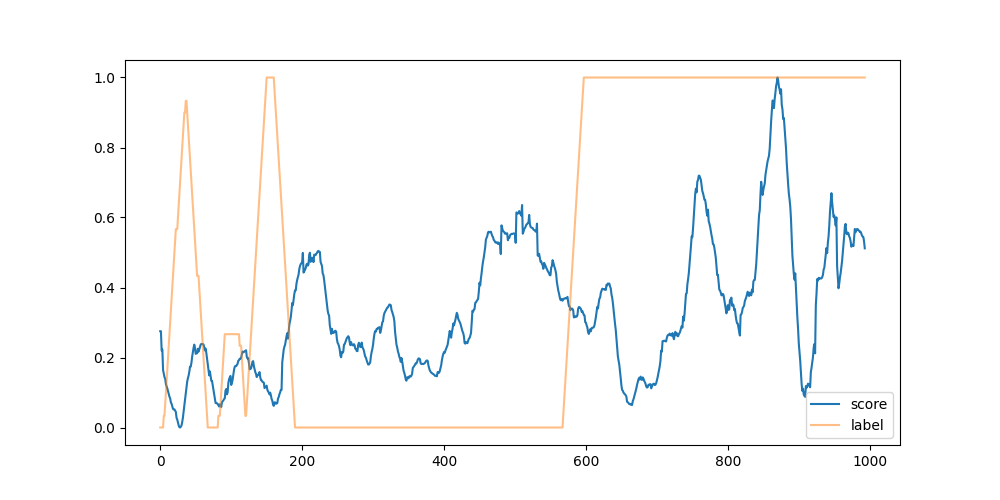

interactive(children=(IntSlider(value=0, description='x', layout=Layout(width='99%'), max=1022), Output()), _d…

<IPython.core.display.Javascript object>


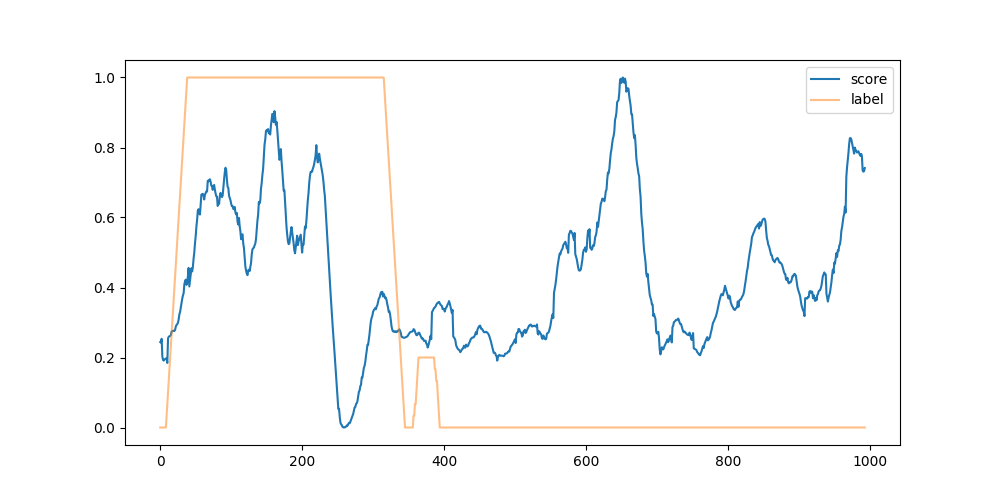

interactive(children=(IntSlider(value=0, description='x', layout=Layout(width='99%'), max=1022), Output()), _d…

<IPython.core.display.Javascript object>


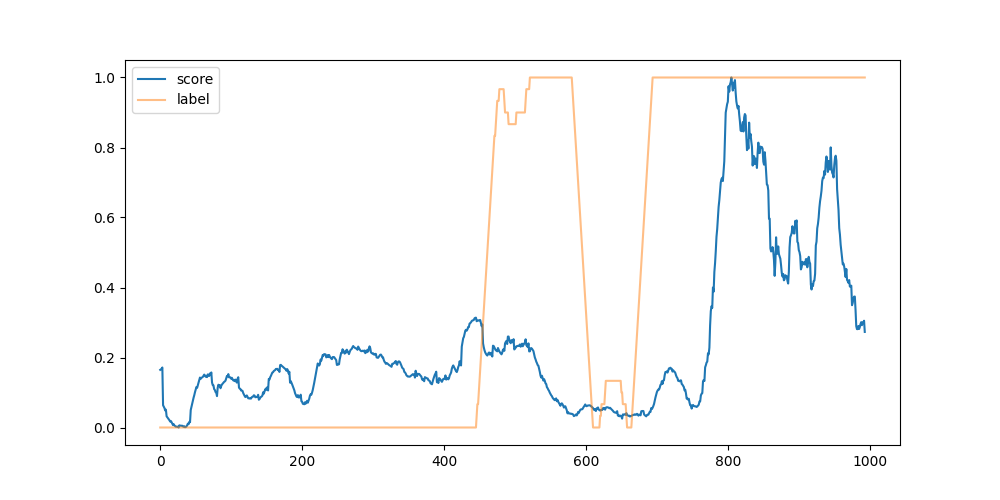

interactive(children=(IntSlider(value=0, description='x', layout=Layout(width='99%'), max=1022), Output()), _d…

<IPython.core.display.Javascript object>


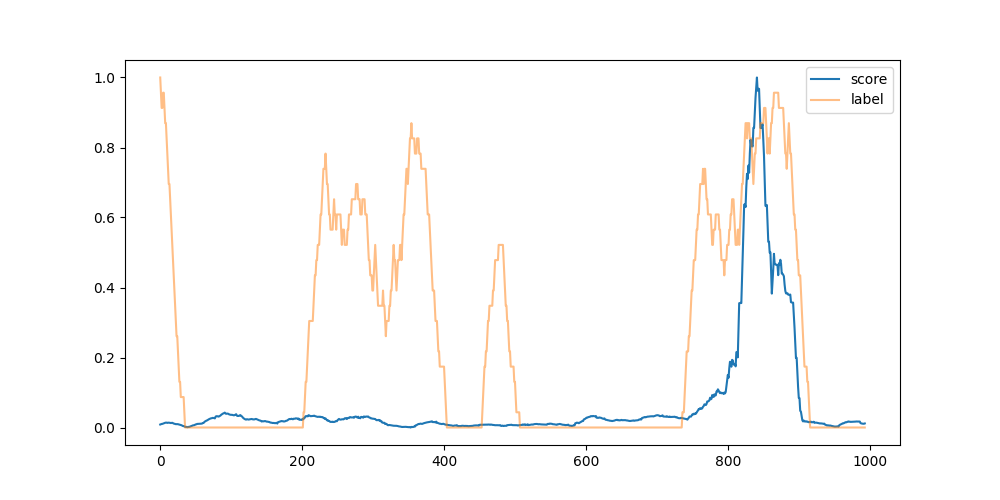

interactive(children=(IntSlider(value=0, description='x', layout=Layout(width='99%'), max=1022), Output()), _d…

<IPython.core.display.Javascript object>


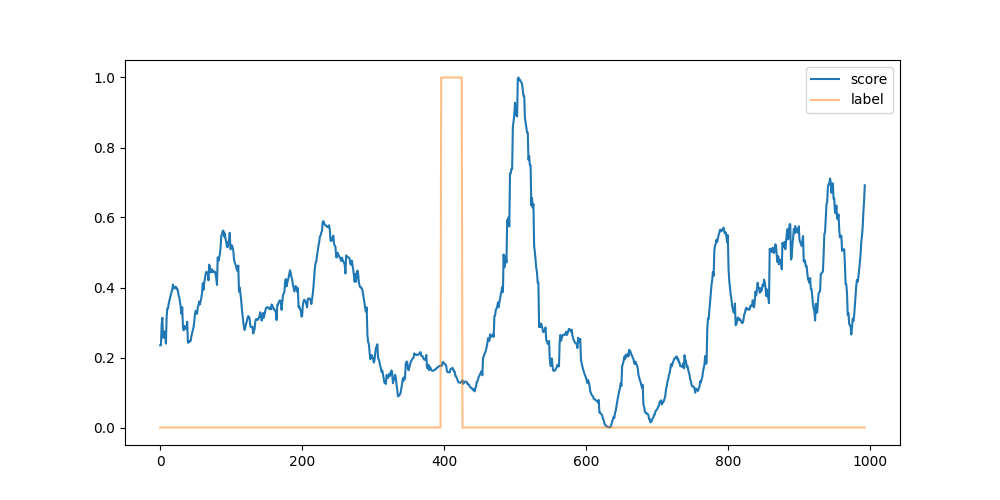

interactive(children=(IntSlider(value=0, description='x', layout=Layout(width='99%'), max=1022), Output()), _d…

<IPython.core.display.Javascript object>


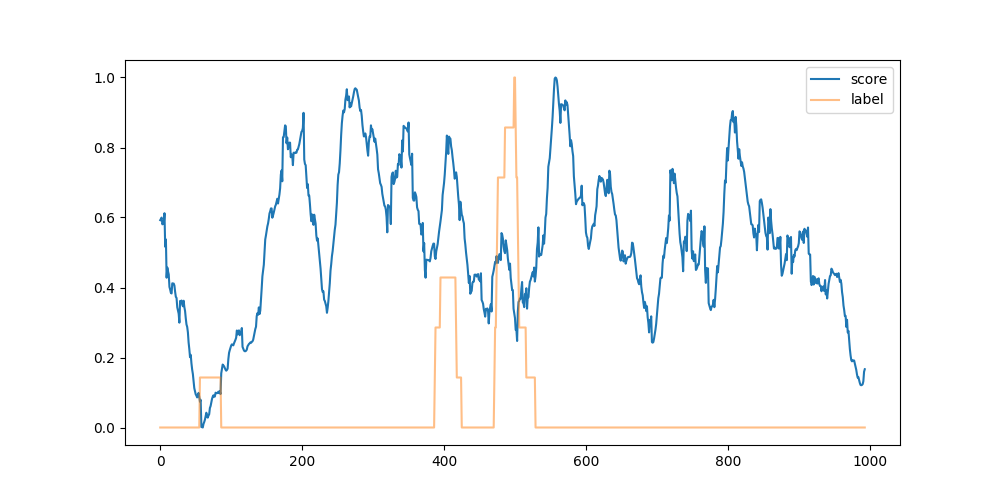

interactive(children=(IntSlider(value=0, description='x', layout=Layout(width='99%'), max=1022), Output()), _d…

<IPython.core.display.Javascript object>


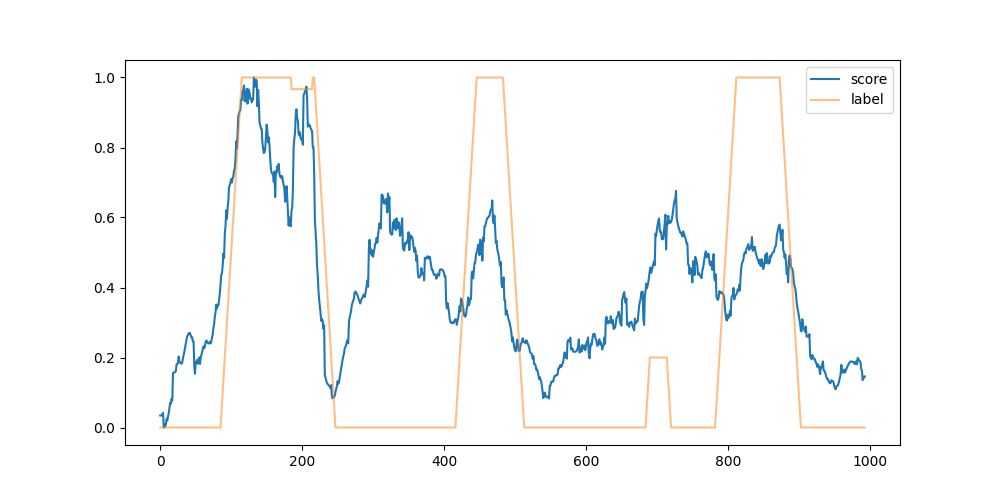

interactive(children=(IntSlider(value=0, description='x', layout=Layout(width='99%'), max=1022), Output()), _d…

<IPython.core.display.Javascript object>


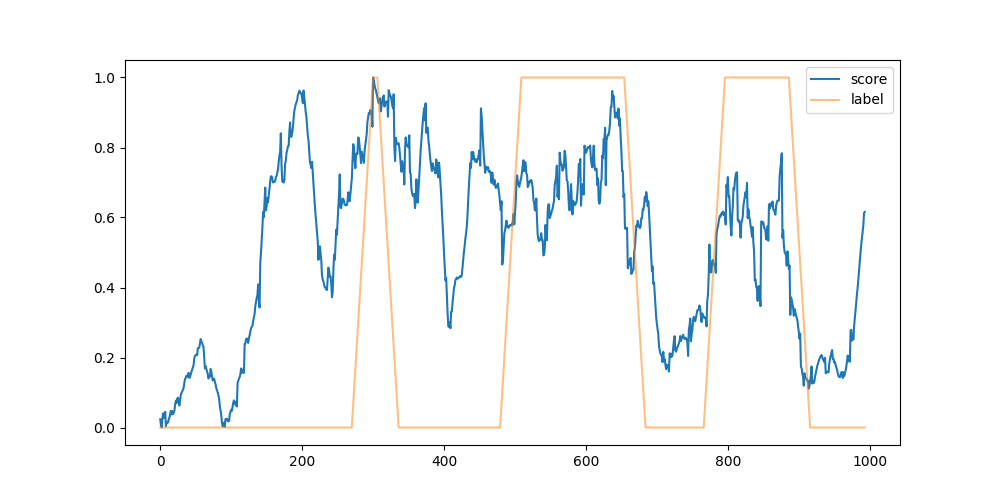

interactive(children=(IntSlider(value=0, description='x', layout=Layout(width='99%'), max=1022), Output()), _d…

<IPython.core.display.Javascript object>


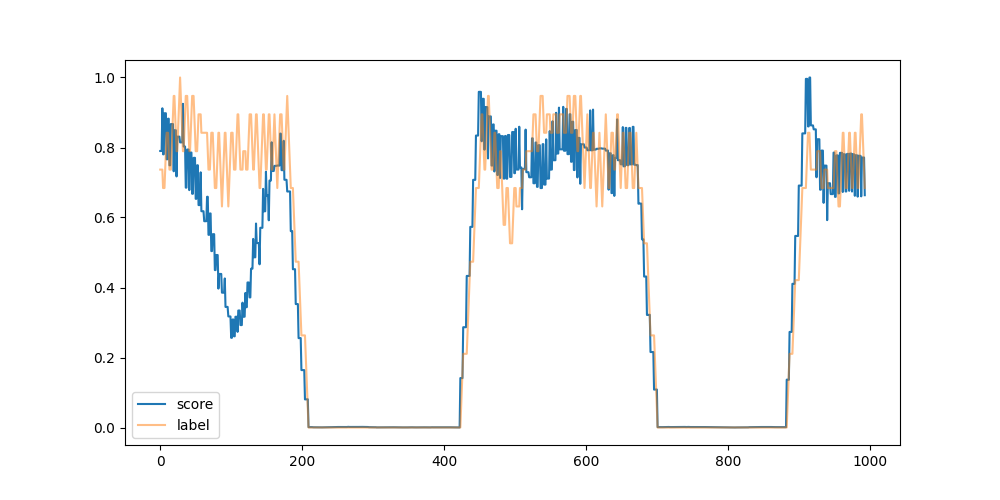

interactive(children=(IntSlider(value=0, description='x', layout=Layout(width='99%'), max=1022), Output()), _d…

<IPython.core.display.Javascript object>


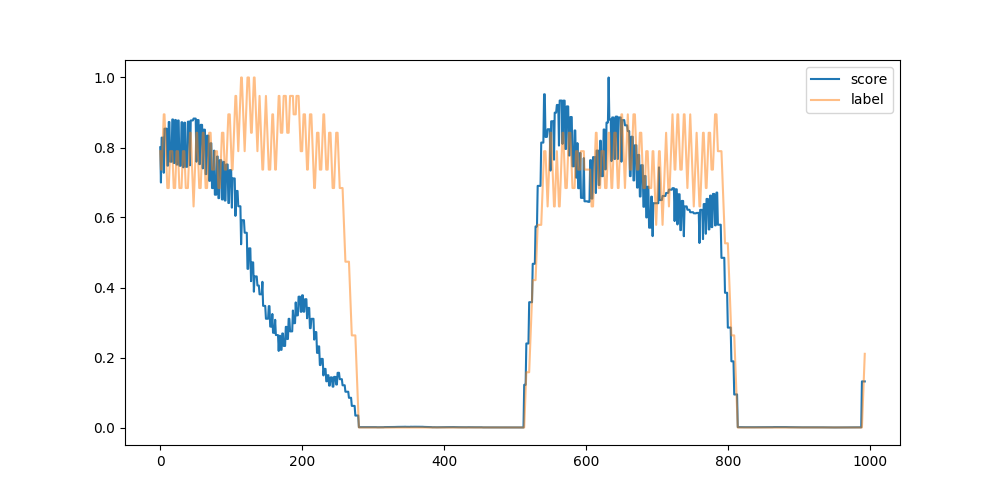

interactive(children=(IntSlider(value=0, description='x', layout=Layout(width='99%'), max=1022), Output()), _d…

<IPython.core.display.Javascript object>


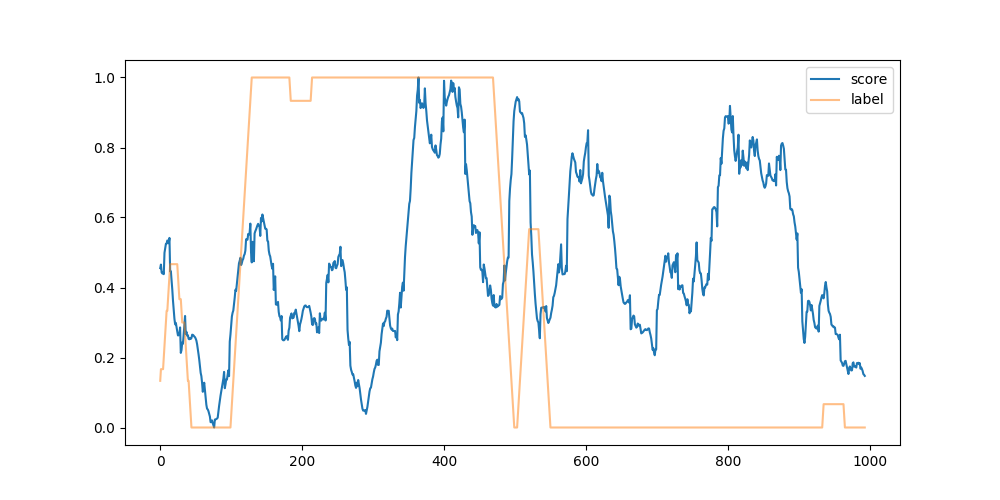

interactive(children=(IntSlider(value=0, description='x', layout=Layout(width='99%'), max=1022), Output()), _d…

<IPython.core.display.Javascript object>


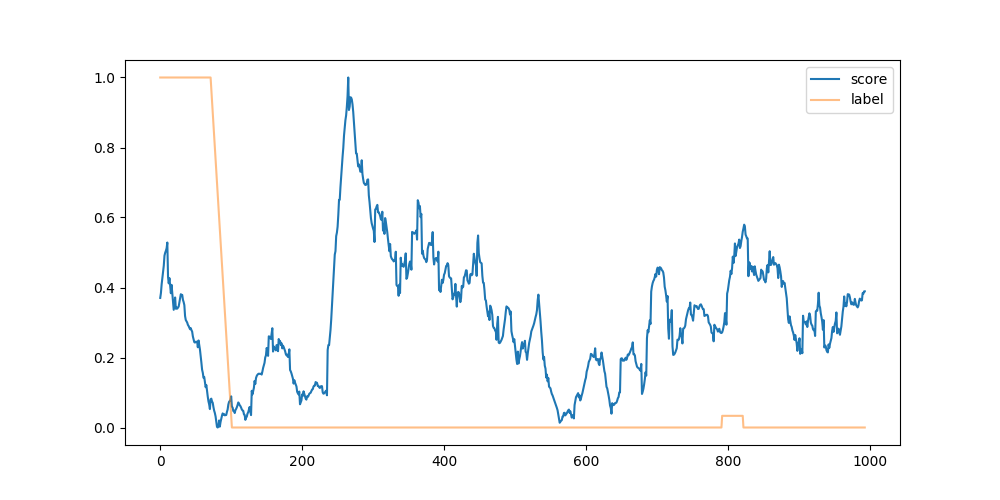

interactive(children=(IntSlider(value=0, description='x', layout=Layout(width='99%'), max=1022), Output()), _d…

<IPython.core.display.Javascript object>


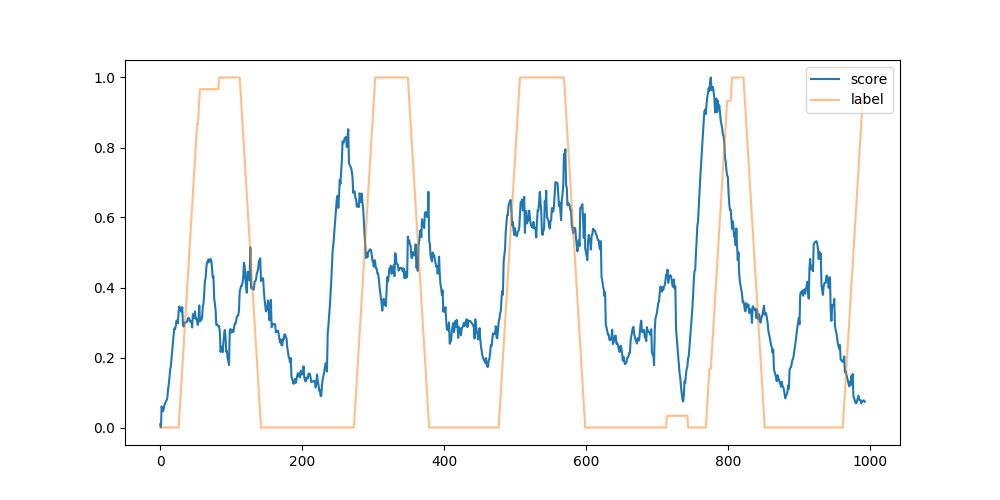

interactive(children=(IntSlider(value=0, description='x', layout=Layout(width='99%'), max=1022), Output()), _d…

<IPython.core.display.Javascript object>


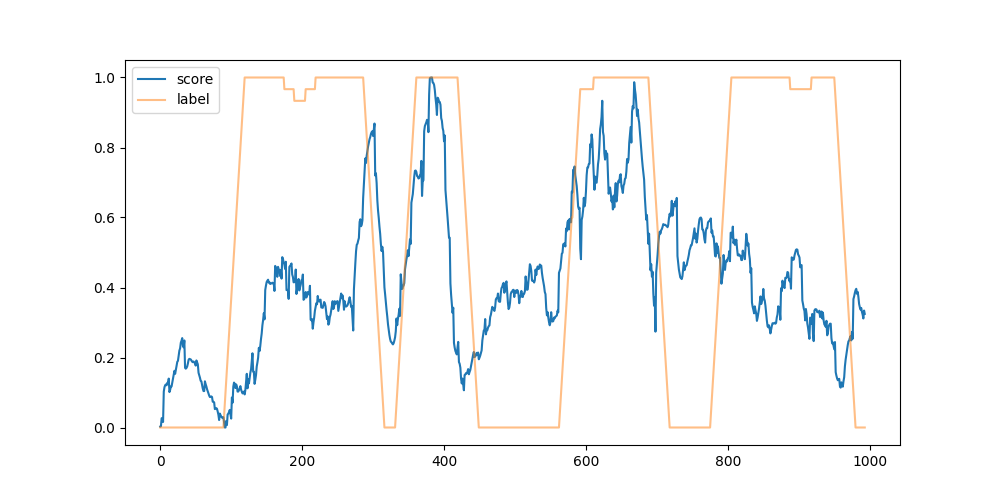

interactive(children=(IntSlider(value=0, description='x', layout=Layout(width='99%'), max=1022), Output()), _d…

<IPython.core.display.Javascript object>


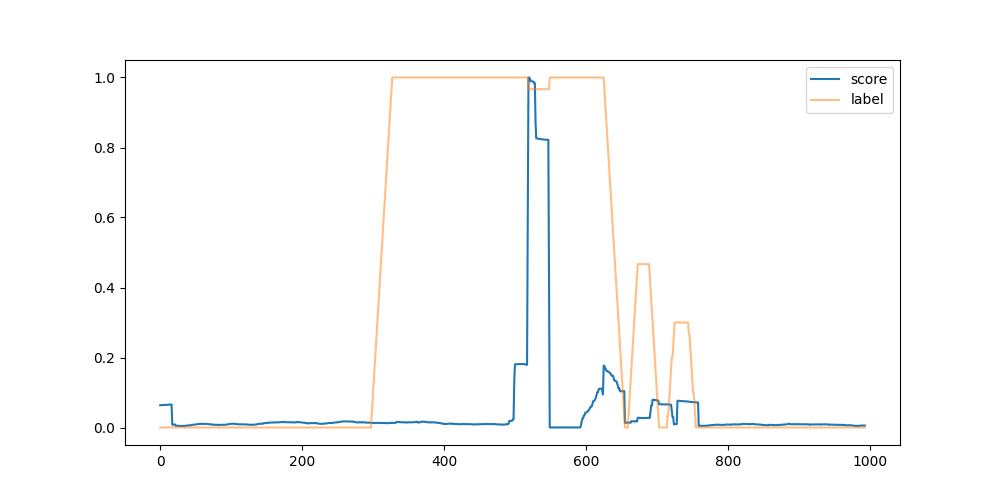

interactive(children=(IntSlider(value=0, description='x', layout=Layout(width='99%'), max=1022), Output()), _d…

<IPython.core.display.Javascript object>


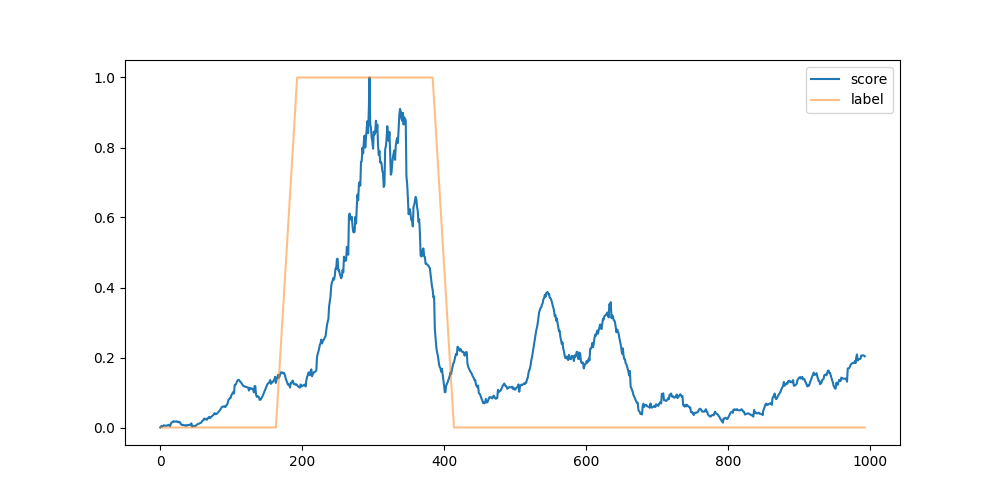

In [30]:
model = Encoder(config.state_shape, config.latent_shape)
model.load_state_dict(torch.load("./S3N.pt"))
criterion = lambda x1,x2: ((x1 - x2) ** 2).sum(-1)
path = 30

with torch.no_grad():
    n = 1024
    for obs, mask in dataset:
        o1, o2, mask = obs[:n-1], obs[1:n], mask[:n-1]
    
        z1, z2 = model(o1), model(o2)
        score = criterion(z1, z2)
        score = score.unfold(0,path,1).sum(-1)
        score = np.interp(score.numpy(), (score.min(), score.max()), (0, +1))
        
        label = (mask.reshape(mask.shape[0],-1).sum(-1) > 0).float()
        label = label.unfold(0,path,1).sum(-1)
        label = np.interp(label.numpy(), (label.min(), label.max()), (0, +1))
        
        J.images(torch.cat([o1, mask], dim=3),scale=3)
        fig = plt.figure(figsize=(10,5))
        plt.plot(np.arange(score.shape[0]), score, label="score")
        plt.plot(np.arange(score.shape[0]), label, label="label", alpha=0.5)
        plt.legend()

In [23]:
import torch.nn.functional as F
n = 5
torch.arange(0,10).unfold(0,n,1)

tensor([[0, 1, 2, 3, 4],
        [1, 2, 3, 4, 5],
        [2, 3, 4, 5, 6],
        [3, 4, 5, 6, 7],
        [4, 5, 6, 7, 8],
        [5, 6, 7, 8, 9]])